In [1]:
from imblearn.over_sampling import SMOTEN
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('all_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

data.dropna()
data = data.loc[:, data.columns != 'mins']

In [3]:
def data_vis(data, is_whole):

    if is_whole:
        data = data[["student_emotion"]]
    emos = data["student_emotion"].unique()
    counts = []
    for emo in emos:
        df = data.loc[data['student_emotion'] == emo]
        counts.append(df.shape[0])


    plt.figure(figsize=(10, 5))
    plt.bar(emos, counts)
    plt.show()


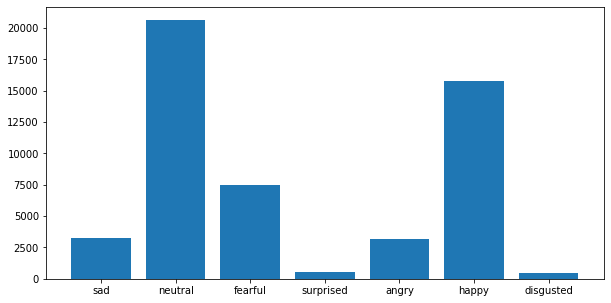

In [4]:
data_vis(data, True)

In [5]:
X = data.loc[:, data.columns != 'student_emotion']
y = data[["student_emotion"]]

In [6]:
seed = 42
smote = SMOTEN(sampling_strategy='auto', random_state=seed)

In [7]:
X, y = smote.fit_resample(X, y)

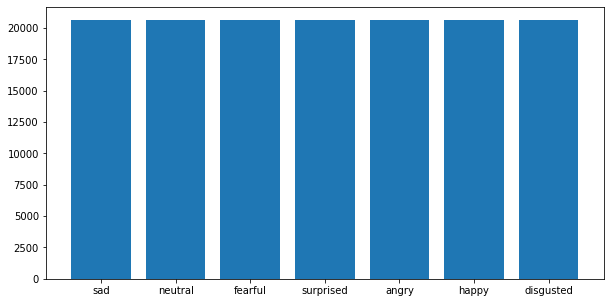

In [8]:
data_vis(y, False)

In [9]:
X = pd.get_dummies(X).to_numpy()
y = pd.get_dummies(y).to_numpy()

In [10]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=seed)


In [11]:
with open("train_data_X_smoten.npy", "wb") as f:
    np.save(f,X_train)
with open("train_data_y_smoten.npy", "wb") as f:
    np.save(f,y_train)
with open("test_data_y_smoten.npy", "wb") as f:
    np.save(f,y_test)
with open("test_data_X_smoten.npy", "wb") as f:
    np.save(f,X_test)